# Week 3: Improve MNIST with Convolutions

In the videos you looked at how you would improve Fashion MNIST using Convolutions. For this exercise see if you can improve MNIST to 99.5% accuracy or more by adding only a single convolutional layer and a single MaxPooling 2D layer to the model from the  assignment of the previous week. 

You should stop training once the accuracy goes above this amount. It should happen in less than 10 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your callback.

When 99.5% accuracy has been hit, you should print out the string "Reached 99.5% accuracy so cancelling training!"


In [1]:
# IMPORTANT: This will check your notebook's metadata for grading.
# Please do not continue the lab unless the output of this cell tells you to proceed. 
!python add_metadata.py --filename C1W3_Assignment.ipynb

Grader metadata detected! You can proceed with the lab!


_**NOTE:** To prevent errors from the autograder, you are not allowed to edit or delete non-graded cells in this notebook . Please only put your solutions in between the `### START CODE HERE` and `### END CODE HERE` code comments, and also refrain from adding any new cells. **Once you have passed this assignment** and want to experiment with any of the non-graded code, you may follow the instructions at the bottom of this notebook._

In [2]:
# grader-required-cell

import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

## Load the data

Begin by loading the data. A couple of things to notice:

- The file `mnist.npz` is already included in the current workspace under the `data` directory. By default the `load_data` from Keras accepts a path relative to `~/.keras/datasets` but in this case it is stored somewhere else, as a result of this, you need to specify the full path.

- `load_data` returns the train and test sets in the form of the tuples `(x_train, y_train), (x_test, y_test)` but in this exercise you will be needing only the train set so you can ignore the second tuple.

In [3]:
# grader-required-cell

# Load the data

# Get current working directory
current_dir = os.getcwd()

# Append data/mnist.npz to the previous path to get the full path
data_path = os.path.join(current_dir, "data/mnist.npz")

# Get only training set
(training_images, training_labels), _ = tf.keras.datasets.mnist.load_data(path=data_path)


## Pre-processing the data

One important step when dealing with image data is to preprocess the data. During the preprocess step you can apply transformations to the dataset that will be fed into your convolutional neural network.

Here you will apply two transformations to the data:
- Reshape the data so that it has an extra dimension. The reason for this 
is that commonly you will use 3-dimensional arrays (without counting the batch dimension) to represent image data. The third dimension represents the color using RGB values. This data might be in black and white format so the third dimension doesn't really add any additional information for the classification process but it is a good practice regardless.


- Normalize the pixel values so that these are values between 0 and 1. You can achieve this by dividing every value in the array by the maximum.

Remember that these tensors are of type `numpy.ndarray` so you can use functions like [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) or [divide](https://numpy.org/doc/stable/reference/generated/numpy.divide.html) to complete the `reshape_and_normalize` function below:

In [4]:
# grader-required-cell

# GRADED FUNCTION: reshape_and_normalize

def reshape_and_normalize(images):
    
    ### START CODE HERE

    # Reshape the images to add an extra dimension
    images = images.reshape([60000, 28, 28, 1])
    
    # Normalize pixel values
    images = images/255.0
    
    ### END CODE HERE

    return images

Test your function with the next cell:

In [5]:
# grader-required-cell

# Reload the images in case you run this cell multiple times
(training_images, _), _ = tf.keras.datasets.mnist.load_data(path=data_path)

# Apply your function
training_images = reshape_and_normalize(training_images)

print(f"Maximum pixel value after normalization: {np.max(training_images)}\n")
print(f"Shape of training set after reshaping: {training_images.shape}\n")
print(f"Shape of one image after reshaping: {training_images[0].shape}")


Maximum pixel value after normalization: 1.0

Shape of training set after reshaping: (60000, 28, 28, 1)

Shape of one image after reshaping: (28, 28, 1)


In [19]:
(training_images, training_labels), _ = tf.keras.datasets.mnist.load_data(path=data_path)

In [27]:
help(tf.keras.datasets.mnist.load_data)

Help on function load_data in module keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
    
  

Expected output -  9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  

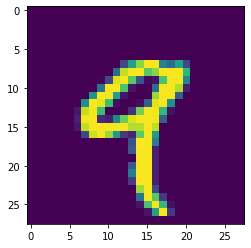

In [25]:
import matplotlib.pyplot as plt
var = 4
plt.imshow(training_images[var])
print('Expected output - ', training_labels[var])
print(training_images[var])

**Expected Output:**
```
Maximum pixel value after normalization: 1.0

Shape of training set after reshaping: (60000, 28, 28, 1)

Shape of one image after reshaping: (28, 28, 1)
```

## Defining your callback

Now complete the callback that will ensure that training will stop after an accuracy of 99.5% is reached.

Define your callback in such a way that it checks for the metric `accuracy` (`acc` can normally be used as well but the grader expects this metric to be called `accuracy` so to avoid getting grading errors define it using the full word).

In [6]:
# grader-required-cell

# GRADED CLASS: myCallback
### START CODE HERE
class myCallback(tf.keras.callbacks.Callback):
# Remember to inherit from the correct class
    # Define the method that checks the accuracy at the end of each epoch
    
    # Define the method that checks the accuracy at the end of each epoch
       def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.995: # @KEEP
            print("\nReached 99.5% accuracy. Stopping...") 
            self.model.stop_training = True
    #pass
### END CODE HERE

## Convolutional Model

Finally, complete the `convolutional_model` function below. This function should return your convolutional neural network.

**Your model should achieve an accuracy of 99.5% or more before 10 epochs to pass this assignment.**

**Hints:**
- You can try any architecture for the network but try to keep in mind you don't need a complex one. For instance, only one convolutional layer is needed.
- In case you need extra help you can check out an architecture that works pretty well at the end of this notebook.
- To avoid timeout issues with the autograder, please limit the number of units in your convolutional and dense layers. An exception will be raised if your model is too large.

In [7]:
# grader-required-cell

# GRADED FUNCTION: convolutional_model
def convolutional_model():
    ### START CODE HERE

    # Define the model, it should have 5 layers:
    # - A Conv2D layer with 32 filters, a kernel_size of 3x3, ReLU activation function
    #    and an input shape that matches that of every image in the training set
    # - A MaxPooling2D layer with a pool_size of 2x2
    # - A Flatten layer with no arguments
    # - A Dense layer with 128 units and ReLU activation function
    # - A Dense layer with 10 units and softmax activation function
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]) 

    # Compile the model
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 
        
    return model

In [8]:
# grader-required-cell

# Save your untrained model
model = convolutional_model()

# Get number of weights
model_params = model.count_params()

# Unit test to limit the size of the model
assert model_params < 1000000, (
    f'Your model has {model_params:,} params. For successful grading, please keep it ' 
    f'under 1,000,000 by reducing the number of units in your Conv2D and/or Dense layers.'
)

# Instantiate the callback class
callbacks = myCallback()

# Train your model (this can take up to 5 minutes)
history = model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1487 - accuracy: 0.9559
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0526 - accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0330 - accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0224 - accuracy: 0.99282s - - ETA: 1s - loss: 0
Epoch 5/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0148 - accuracy: 0.9954
Reached 99.5% accuracy. Stopping...
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0148 - accuracy: 0.9954


If you see the message that you defined in your callback printed out after less than 10 epochs it means your callback worked as expected. You can also double check by running the following cell:

In [9]:
# grader-required-cell

print(f"Your model was trained for {len(history.epoch)} epochs")

Your model was trained for 5 epochs


If your callback didn't stop training, one cause might be that you compiled your model using a metric other than `accuracy` (such as `acc`). Make sure you set the metric to `accuracy`. You can check by running the following cell:

In [10]:
if not "accuracy" in history.model.metrics_names:
    print("Use 'accuracy' as metric when compiling your model.")
else:
    print("The metric was correctly defined.")

The metric was correctly defined.


## Need more help?

Run the following cell to see an architecture that works well for the problem at hand:

In [11]:
# WE STRONGLY RECOMMEND YOU TO TRY YOUR OWN ARCHITECTURES FIRST
# AND ONLY RUN THIS CELL IF YOU WISH TO SEE AN ANSWER

import base64

encoded_answer = "CiAgIC0gQSBDb252MkQgbGF5ZXIgd2l0aCAzMiBmaWx0ZXJzLCBhIGtlcm5lbF9zaXplIG9mIDN4MywgUmVMVSBhY3RpdmF0aW9uIGZ1bmN0aW9uIGFuZCBhbiBpbnB1dCBzaGFwZSB0aGF0IG1hdGNoZXMgdGhhdCBvZiBldmVyeSBpbWFnZSBpbiB0aGUgdHJhaW5pbmcgc2V0CiAgIC0gQSBNYXhQb29saW5nMkQgbGF5ZXIgd2l0aCBhIHBvb2xfc2l6ZSBvZiAyeDIKICAgLSBBIEZsYXR0ZW4gbGF5ZXIgd2l0aCBubyBhcmd1bWVudHMKICAgLSBBIERlbnNlIGxheWVyIHdpdGggMTI4IHVuaXRzIGFuZCBSZUxVIGFjdGl2YXRpb24gZnVuY3Rpb24KICAgLSBBIERlbnNlIGxheWVyIHdpdGggMTAgdW5pdHMgYW5kIHNvZnRtYXggYWN0aXZhdGlvbiBmdW5jdGlvbgo="
encoded_answer = encoded_answer.encode('ascii')
answer = base64.b64decode(encoded_answer)
answer = answer.decode('ascii')

print(answer)


   - A Conv2D layer with 32 filters, a kernel_size of 3x3, ReLU activation function and an input shape that matches that of every image in the training set
   - A MaxPooling2D layer with a pool_size of 2x2
   - A Flatten layer with no arguments
   - A Dense layer with 128 units and ReLU activation function
   - A Dense layer with 10 units and softmax activation function



**Congratulations on finishing this week's assignment!**

You have successfully implemented a CNN to assist you in the image classification task. Nice job!

**Keep it up!**

<details>
  <summary><font size="2" color="darkgreen"><b>Please click here if you want to experiment with any of the non-graded code.</b></font></summary>
    <p><i><b>Important Note: Please only do this when you've already passed the assignment to avoid problems with the autograder.</b></i>
    <ol>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “Edit Metadata”</li>
        <li> Hit the “Edit Metadata” button next to the code cell which you want to lock/unlock</li>
        <li> Set the attribute value for “editable” to:
            <ul>
                <li> “true” if you want to unlock it </li>
                <li> “false” if you want to lock it </li>
            </ul>
        </li>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “None” </li>
    </ol>
    <p> Here's a short demo of how to do the steps above: 
        <br>
        <img src="https://drive.google.com/uc?export=view&id=14Xy_Mb17CZVgzVAgq7NCjMVBvSae3xO1" align="center">
</details>